## What Is Supervised Learning?

* Learning under supervision, someone is present judging whether you’re getting the right answer.
* In machine learning, it means that you have a full set of labeled data while training an algorithm.
* After learning, you don't need supervision and you can work on your own to handle new cases.

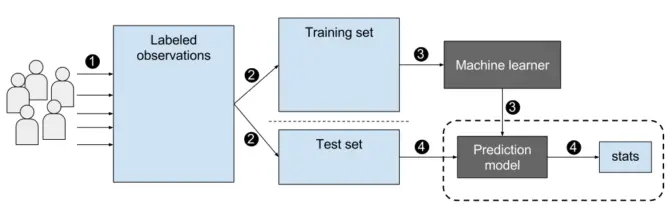

### Two types of supervised machine learning algorithms
* <b>Regression</b>, which predicts continuous value outputs. For example, predicting home price based on size.
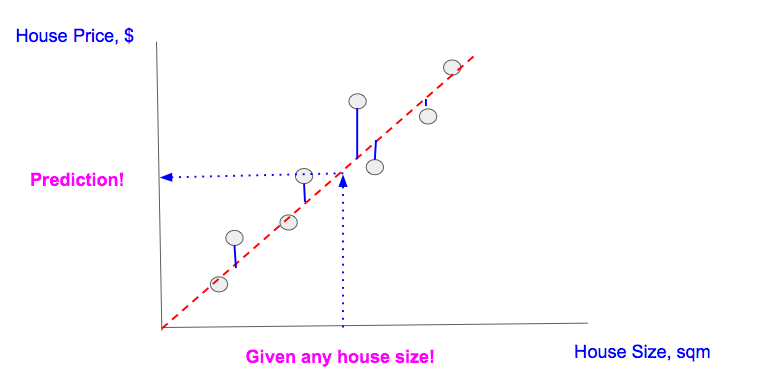

* <b>Classification</b>, which predicts categorical outputs. For example, loan approval, fraud detection, spam filtering.

### Applications of Linear Regression

* Sales Driver Analysis — Linear Regression can be used to predict the sale of products in the future based on past buying behavior
* Predict Economic Growth — Economists use Linear Regression to predict the economic growth of a country or state
* Score Prediction — Sports analyst use linear regression to predict the number of runs or goals a player would score in the coming matches based on previous performances
* Salary Estimation — An organisation can use linear regression to figure out how much they would pay to a new joinee based on the years of experience
* House Price Prediction — Linear regression analysis can help a builder to predict how much houses it would sell in the coming months and at what price
* Oil Price Prediction — Petroleum prices can be predicted using Linear Regression

### <font color='red'>Single Linear Regression</font>

#### Linear Regression Theory
* Linear relationship between two or more variables. 
* If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

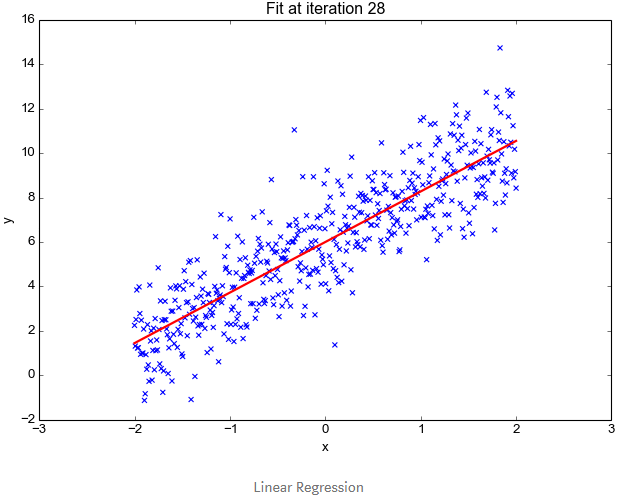

### Mathematically, we want to find the equation of the above line (or we call it a model).

### In general, the problem can be described as below

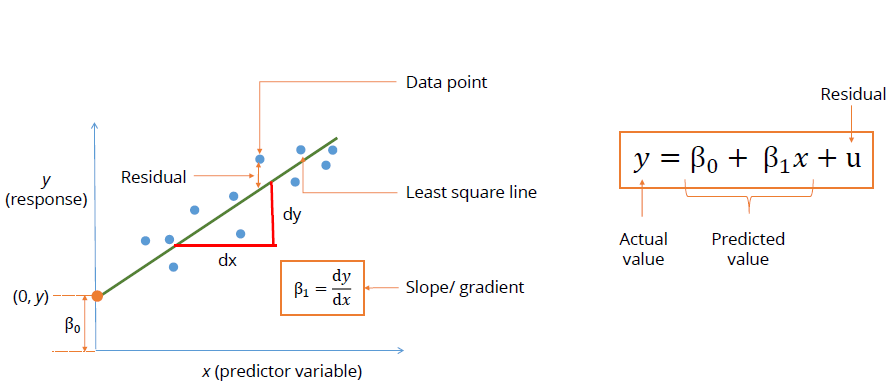

* y — The value that you want to predict
* β₀ — The y-intercept of the line means where the line intersects the Y-axis
* β₁ — The slope or gradient of the line means how steep is the line
* x — The value of the data point
* u — The residual or noise that are caused by unexplained factors

### Seems like we can easily come to best parameter values by hit and trial method and thus finding the best fit line.

In [1]:
from IPython.display import HTML
HTML('<img src="linearRegression.gif">')

#### Train your model

* The model is y = β₀ + β1x

* β₀ is the intercept
* β1 is the slope of the line
* Training the model means we want to find the most optimal value for the intercept and the slope (in two dimensions) so that the line has the least error for the training data.

### Example: Simple Linear Regression for Weather prediction

* The dataset contains information on weather conditions recorded on each day at various weather stations. 
* Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunderstorms or other poor weather conditions.
* Our model is to predict the maximum temperature taking input feature as the minimum temperature.

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
dataset = pd.read_csv('Weather.csv')

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
dataset.shape

(119040, 31)

In [5]:
dataset.describe()

STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.000000   
25%        20.555556      43.000000       4.000000       8.000000   11.000000   
50%        25.555556      44.000000       7.000000      16.000000   32.000000   
75%        27.222222      45.000000      10.000000      23.000000   34.000000   
max        40.000000      45.000000      12.000000      31.000000   78.000000   

              SPD  ...   FT   FB  FTI  ITH         PGT  SD3  RHX  RHN  RVG  \
count  532.000000  ...  0.0  0.0  0.0  0.0  525.000000  0.0  0.0  0.0  0.0   
mean    20.396617  ...  NaN  NaN  NaN  NaN   12.085333  NaN  NaN  NaN  NaN   
std      5.560371  ...  NaN  NaN  NaN  NaN    5.731328  NaN  NaN  NaN  NaN   
min     10.000000  ...  NaN  NaN  NaN  NaN    0.000000  NaN  NaN  NaN  NaN   
25%     16.000000  ...  NaN  NaN  NaN  NaN    8.500000  NaN  NaN  NaN  NaN   
50%     20.000000  ...  NaN  NaN  NaN  NaN   11.600000  NaN  NaN  NaN  NaN   
75%     23.250000  ...  NaN  NaN  NaN  NaN   15.000000  NaN  NaN  NaN  NaN   
max     41.000000  ...  NaN  NaN  NaN  NaN   23.900000  NaN  NaN  NaN  NaN   

       WTE  
count  0.0  
mean   NaN  
std    NaN  
min    NaN  
25%    NaN  
50%    NaN  
75%    NaN  
max    NaN  

[8 rows x 24 columns]

In [6]:
dataset.head()

STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3 NaN  NaN  
4 NaN  NaN  

[5 rows x 31 columns]

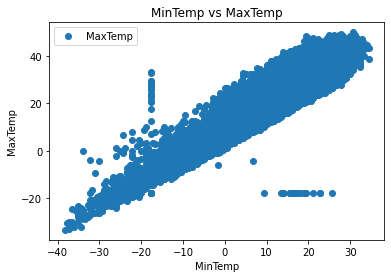

In [7]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

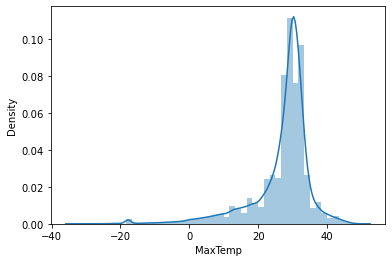

In [8]:
# plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['MaxTemp'])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

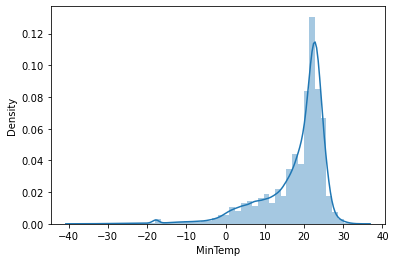

In [9]:
sns.distplot(dataset['MinTemp'])

In [10]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [11]:
dataset['MinTemp'].values#.reshape(-1,1)

array([22.22222222, 21.66666667, 22.22222222, ..., 18.33333333,
       18.33333333, 17.22222222])

In [12]:
dataset['MinTemp'].values.reshape(-1,1)

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [13]:
dataset

STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1  1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2      0          NaN  28.888889  21.666667   
2       10001    1942-7-3   2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4   2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5      0          NaN  26.666667  21.666667   
...       ...         ...    ...          ...        ...        ...   
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  \
0       23.888889      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN   
1       25.555556      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN   
2       24.444444      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN   
3       24.444444      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN   
4       24.444444      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN   
...           ...      ...         ...  ..  ...  ..  ...  ..  ...         ...   
119035  23.333333      0.0         NaN  45  ... NaN  NaN NaN  NaN         NaN   
119036  23.888889      0.0         1.0  45  ... NaN  NaN NaN  NaN         1.0   
119037  23.333333      0.0         1.0  45  ... NaN  NaN NaN  NaN         1.0   
119038  23.333333      0.0         NaN  45  ... NaN  NaN NaN  NaN         NaN   
119039  23.333333      0.0         NaN  45  ... NaN  NaN NaN  NaN         NaN   

        SD3  RHX  RHN RVG  WTE  
0       NaN  NaN  NaN NaN  NaN  
1       NaN  NaN  NaN NaN  NaN  
2       NaN  NaN  NaN NaN  NaN  
3       NaN  NaN  NaN NaN  NaN  
4       NaN  NaN  NaN NaN  NaN  
...     ...  ...  ...  ..  ...  
119035  NaN  NaN  NaN NaN  NaN  
119036  NaN  NaN  NaN NaN  NaN  
119037  NaN  NaN  NaN NaN  NaN  
119038  NaN  NaN  NaN NaN  NaN  
119039  NaN  NaN  NaN NaN  NaN  

[119040 rows x 31 columns]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #what's random_state?

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [16]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [17]:
y_pred = regressor.predict(X_test)
y_pred

array([[33.67035117],
       [30.0912513 ],
       [26.51215143],
       ...,
       [32.64775121],
       [30.60255128],
       [31.62515124]])

In [18]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

Actual  Predicted
0      28.888889  33.670351
1      31.111111  30.091251
2      27.222222  26.512151
3      28.888889  31.113851
4      23.333333  15.774852
...          ...        ...
23803  32.777778  32.136451
23804  32.222222  29.068651
23805  31.111111  32.647751
23806  31.111111  30.602551
23807  36.666667  31.625151

[23808 rows x 2 columns]

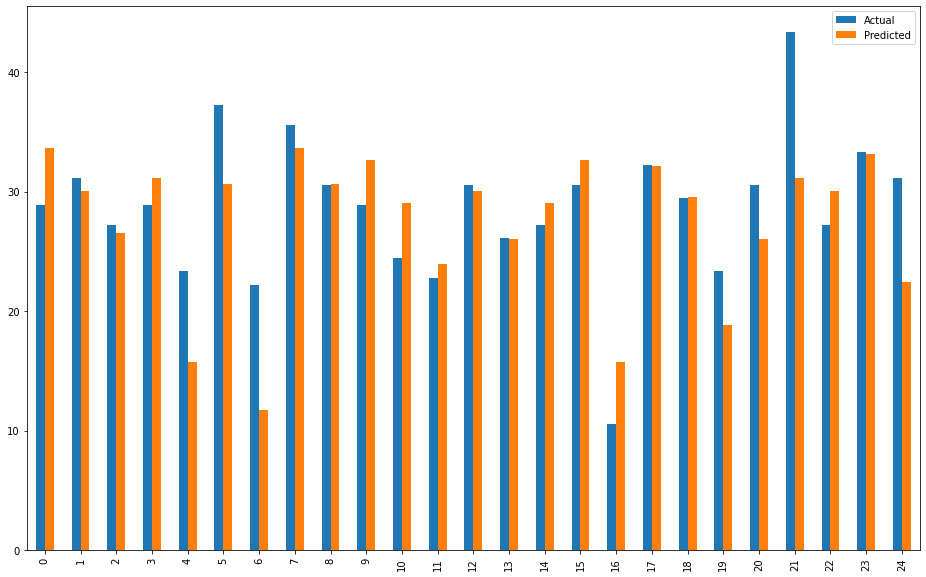

In [19]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

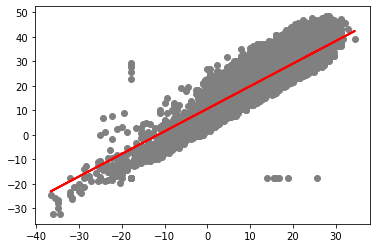

In [20]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
# it looks like the outliers have bad impact on the model

### How to evaluate your model?

* The main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.

* Compare how well different algorithms perform on a particular dataset

* Four evaluation metrics are commonly used

* <b>Mean Absolute Error (MAE)</b> (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set:

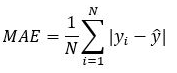


* <b>Mean Squared Error (MSE)</b> (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.:

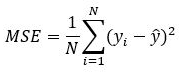

* <b>Root Mean Squared Error (RMSE)</b> is the square root of the mean of the squared errors:

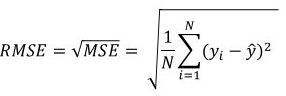

* <b>R-squared (Coefficient of determination)</b> represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

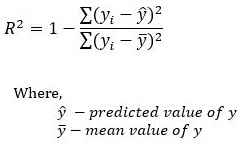

* How to interpret R-squared

    R-squared evaluates the scatter of the data points around the fitted regression line. It is the percentage of the dependent variable variation that a linear model explains.
    
    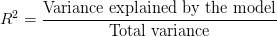

    R-squared is always between 0 and 100%:

    0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
    
    100% represents a model that explains all of the variation in the response variable around its mean.

* The R-squared for the regression model on the left is 15%, and for the model on the right it is 85%

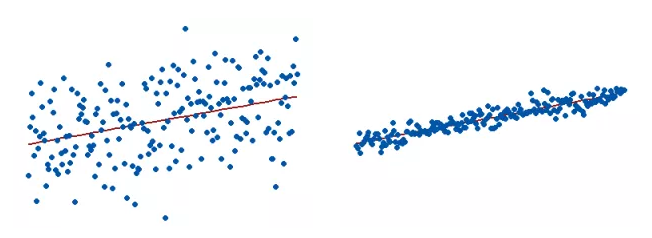

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204
R-squared Error: 0.7670218843587764


### How to interpret the results?

* The value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41.
* This means that our algorithm was not very accurate but can still make reasonably good predictions.
* The model has an R-squared 76.7%, its errors are about 51% smaller on average than those of a constant-only model. The model might be ok but not great.

### <font color='red'>Multiple Linear Regression</font>


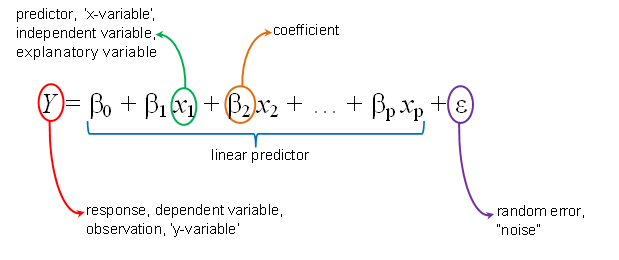

### Of course the hit-and-trial approach won't work here. A more mathematical approach is needed to solve the coefficients.

* We need to define a cost function to optimize. 
* In linear regression, the cost function is a mathematical construct which is calculated by adding up the squared error terms
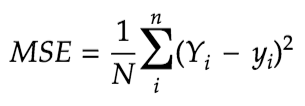

By tweaking the above equation a little we get the below equation:

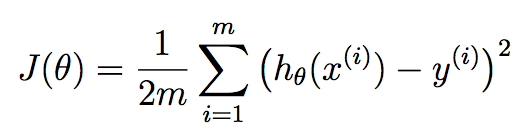

where J is cost notation and θ is the parameter

where the hypothesis function h(x) is denoted by


and m is the total number of training examples in our data-set.

### Gradient Descent

* A simple optimization technique for finding minimum of any function
* In our case we want to find the minima of our MSE function.

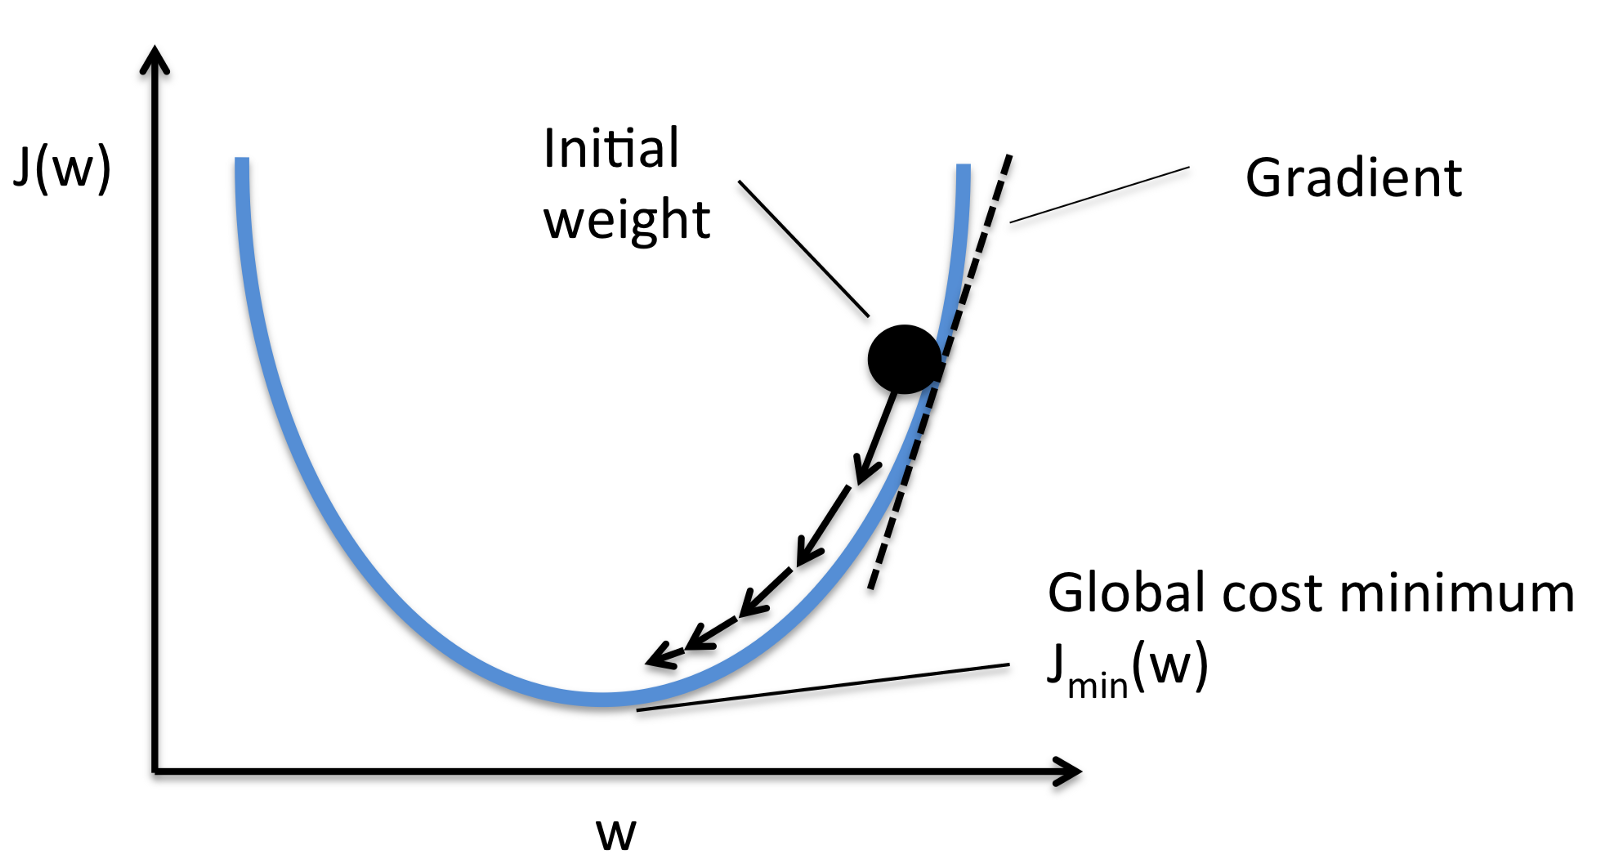

* A visual representation of gradient descent in action has been shown below:

In [22]:
HTML('<img src="gradient.gif">')

* You will see and make out where the slope of the valley is going down
* Then you start taking steps towards the down going slope
* After every step, it updates the parameter (or weights) and by doing the above step repeatedly it reaches to the bottom most point.
* Once you see that every contour around you is higher than where you are standing you claim that you have reached the bottom most point
* This is validated by the slope of that point, if the slope is zero then the algorithm has reached the bottom most point.

#### Once you have reached the bottom most point of the valley that means you have got the parameters corresponding to the least MSE or Cost function, and these values of parameters will fetch you the highest accuracy.

### Example: Multiple Linear Regression for Wine Quality Prediction

In [23]:
dataset = pd.read_csv('winequality-red.csv')

In [24]:
dataset.shape

(1599, 12)

In [25]:
dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [26]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [27]:
dataset = dataset.fillna(method='ffill')

In [28]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

In [29]:
dataset['quality'].values

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [30]:
dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [31]:
dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   

                       alcohol  
fixed acidity        -0.061668  
volatile acidity     -0.202288  
citric acid           0.109903  
residual sugar        0.042075  
chlorides            -0.221141  
free sulfur dioxide  -0.069408  
total sulfur dioxide -0.205654  
density              -0.496180  
pH                    0.205633  
sulphates             0.093595  
alcohol               1.000000

In [32]:
dataset['fixed acidity'].corr(dataset['volatile acidity'])

-0.25613089477038203

In [33]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

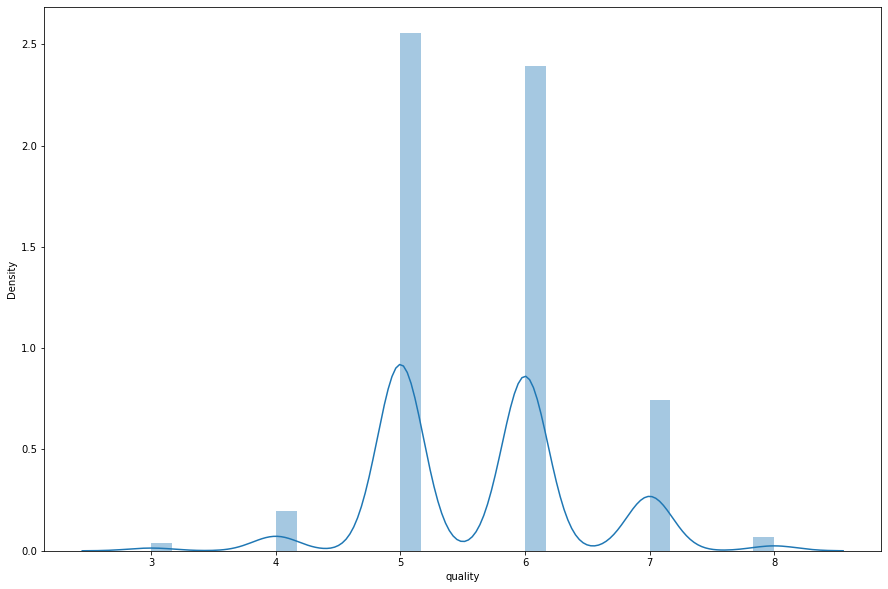

In [34]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['quality'])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [38]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']

coeff_df = pd.DataFrame(regressor.coef_, cols, columns=['Coefficient'])  
coeff_df

Coefficient
fixed acidity            0.041284
volatile acidity        -1.149528
citric acid             -0.177927
residual sugar           0.027870
chlorides               -1.873407
free sulfur dioxide      0.002684
total sulfur dioxide    -0.002777
density                -31.516666
pH                      -0.254486
sulphates                0.924040
alcohol                  0.267797

In [39]:
y_pred = regressor.predict(X_test)

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

Actual  Predicted
0        6   5.782930
1        5   5.036193
2        7   6.596989
3        6   5.339126
4        5   5.939529
5        6   5.007207
6        5   5.396162
7        6   6.052112
8        4   4.867603
9        5   4.950676
10       5   5.285804
11       5   5.412653
12       6   5.705742
13       5   5.129217
14       6   5.528852
15       6   6.380524
16       7   6.810125
17       5   5.738033
18       5   5.976188
19       4   5.086134
20       7   6.344799
21       6   5.164010
22       6   5.642040
23       4   6.146290
24       6   5.481780

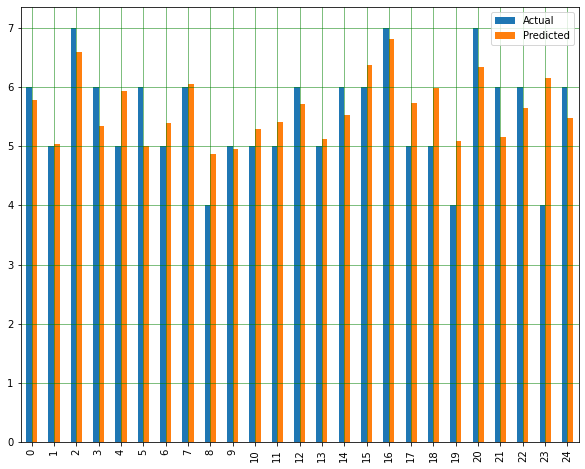

In [41]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.46963309286611066
Mean Squared Error: 0.3844711978201245
Root Mean Squared Error: 0.6200574149384269
R-squared Error: 0.32838876395802197


### How to interpret the results?

* You can see that the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63. 
* This means that our algorithm was not very accurate but can still make reasonably good predictions.

### How to improve your model?

There are many factors that may have contributed to this inaccuracy, for example :
* Need more data: We need to have a huge amount of data to get the best possible prediction.
* Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
* Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

### <font color='red'>Binary Logistic Regression, i.e., two-class classification</font>

* Predict the probability of a categorical dependent variable
* The dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). 
* In other words, the logistic regression model predicts P(Y=1) as a function of X.

#### Logistic Regression Assumptions
* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.

### Linear Regression vs Logistic Regression

* In Linear Regression, the output is the weighted sum of inputs. 
* Logistic Regression doesn't output the weighted sum of inputs directly, but passes it through an activation function that can map any real value between 0 and 1.
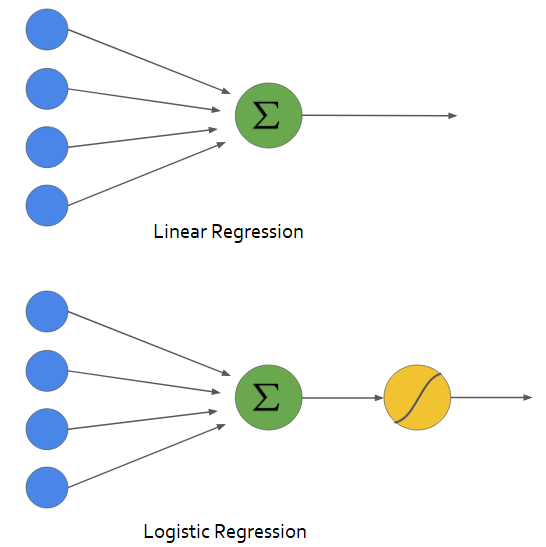

* The activation function that is used is known as the sigmoid function. The basic sigmoid function is called logistic function. It looks like
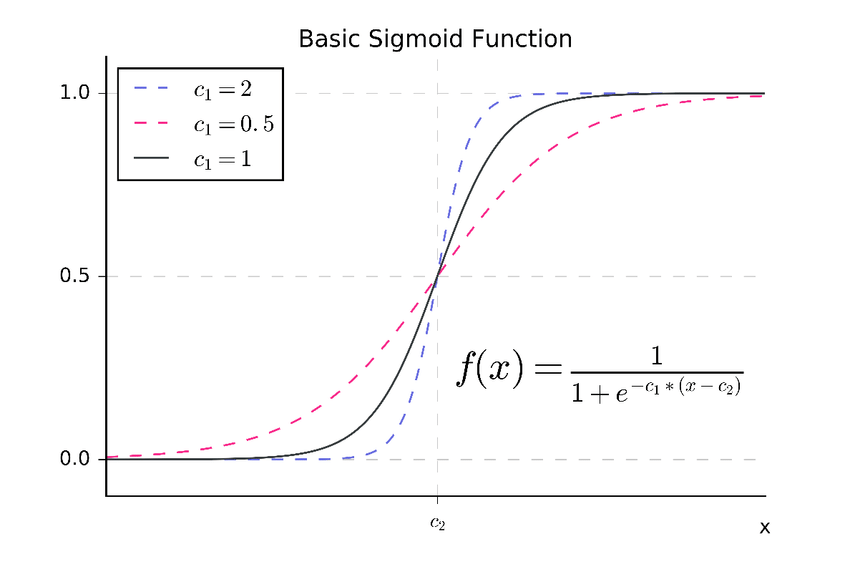

* Some other sigmoid functions
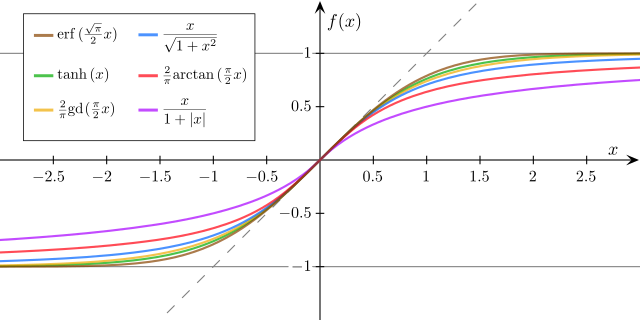

* The value of the sigmoid function always lies between 0 and 1. 
* The value is exactly 0.5 at X=0. We can use a probability threshold to determine the classes. If the probability is greater than the threshold, we classify it as Class-1(Y=1) or else as Class-0(Y=0).
* The threshold doesn't have to be 0.5

### Some math behind logistic regression

* A Linear Regression model can be represented by the equation.



or



* We then apply the sigmoid function to the output of the linear regression



* As we just learned, the sigmoid function is logistic function

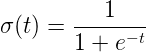

* Put all together, we have

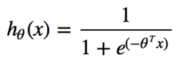

* The probability of Y by given input x and &theta;, where y is 0 or 1

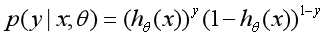

* The maximum likelihood equation is:

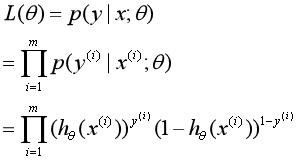

* In logarithmic form:

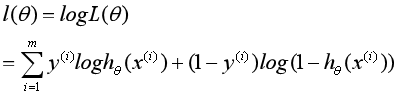

* If we define the cost function as

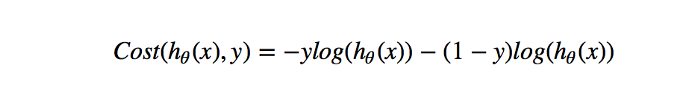

* So the cost function of the model is the summation from all training data samples:

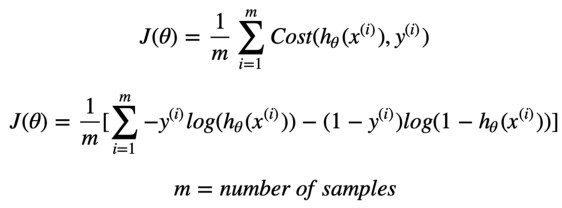

* Now all we want is to find the &theta; so that the cost fnction will be minimized. Remember that the general form of gradient descent is

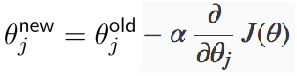

* where the gradient descent is:
https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

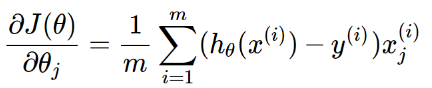

* Putting together, now we just need to repeat the process. In machine learning, we call it "<font color="red"><b>train the model</b></font>".

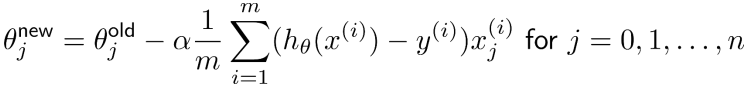

### Example, predict users' behavior

* We will use advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. 
* We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ad_data = pd.read_csv('advertising.csv')
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [44]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [45]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

#### Split the data into training set and testing set using train_test_split

In [46]:
ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True) #only keep the numeric columns
X = ad_data.drop(['Clicked on Ad'], axis = 1)
y = ad_data['Clicked on Ad']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#### Now we want to use logistic regression for our problem, then train and fit this model on the training set

In [47]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

#### We are done! Now predict values for the testing data and create an evaluation report for the model.

In [48]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



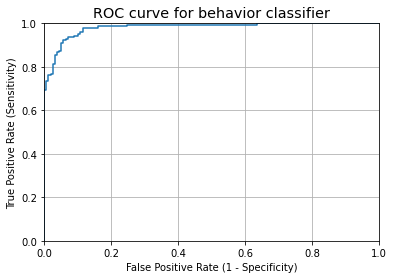

In [50]:
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)
probs_y=logmodel.predict_proba(X_test) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_y[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for behavior classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [51]:
# You may need to install the package
# pip install plotly.express

import plotly.express as px
from sklearn.metrics import roc_curve, auc
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

References:

https://blogs.nvidia.com/blog/2018/08/02/supervised-unsupervised-learning/

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

https://hackernoon.com/an-intuitive-perspective-to-linear-regression-7dc566b2c14c

https://www.cloudera.com/tutorials/building-a-linear-regression-model-for-predicting-house-prices.html

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://www.fatalerrors.org/a/the-realization-of-logistic-regression-model.html

https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11

https://github.com/shoaibb/Logistic-Regression/blob/master/Logistic%20Regression.ipynb